In [1]:
import os, sys
import numpy as np
import pandas as pd
sys.path.append('../..')
from src import direcslist, load_image, raw_data_path, ImageQuant2
%matplotlib widget

In [2]:
basepath = raw_data_path + '/Imaging/Optogenetics'
paths = direcslist(basepath, 2)

imgs = [load_image(p + '/rfp_channel_flat.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

In [3]:
# Load reference profiles
cytbg = np.loadtxt('../../data/calibration_cyt.txt')
membg1 = np.loadtxt('../../data/calibration_mem1.txt')
membg2 = np.loadtxt('../../data/calibration_mem2.txt')
membg3 = np.loadtxt('../../data/calibration_mem3.txt')
membg4 = np.loadtxt('../../data/calibration_mem4.txt')
membg5 = np.loadtxt('../../data/calibration_mem5.txt')
membg6 = np.loadtxt('../../data/calibration_mem6.txt')

In [4]:
# Global calibration parameterrs
kwargs_dict = {'lr': 0.005, 'descent_steps': 600}

### Quantification 0
Naive - uses error function and gaussian

  0%|                                                                                                                                                         | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                                | 1/600 [00:00<09:00,  1.11it/s]

  2%|██▏                                                                                                                                              | 9/600 [00:01<00:49, 11.82it/s]

  3%|███▊                                                                                                                                            | 16/600 [00:01<00:27, 21.26it/s]

  4%|█████▌                                                                                                                                          | 23/600 [00:01<00:19, 30.06it/s]

  5%|███████▋                                                                                                                                        | 32/600 [00:01<00:13, 41.70it/s]

  7%|█████████▊                                                                                                                                      | 41/600 [00:01<00:10, 52.44it/s]

  8%|███████████▊                                                                                                                                    | 49/600 [00:01<00:09, 58.72it/s]

 10%|█████████████▋                                                                                                                                  | 57/600 [00:01<00:08, 63.52it/s]

 11%|███████████████▌                                                                                                                                | 65/600 [00:01<00:07, 66.88it/s]

 12%|█████████████████▌                                                                                                                              | 73/600 [00:01<00:07, 68.33it/s]

 14%|███████████████████▍                                                                                                                            | 81/600 [00:01<00:07, 70.73it/s]

 15%|█████████████████████▎                                                                                                                          | 89/600 [00:02<00:07, 71.98it/s]

 16%|███████████████████████▎                                                                                                                        | 97/600 [00:02<00:06, 73.60it/s]

 18%|█████████████████████████                                                                                                                      | 105/600 [00:02<00:06, 74.66it/s]

 19%|██████████████████████████▉                                                                                                                    | 113/600 [00:02<00:06, 75.78it/s]

 20%|████████████████████████████▊                                                                                                                  | 121/600 [00:02<00:06, 76.73it/s]

 22%|██████████████████████████████▋                                                                                                                | 129/600 [00:02<00:06, 76.96it/s]

 23%|████████████████████████████████▋                                                                                                              | 137/600 [00:02<00:06, 76.70it/s]

 24%|██████████████████████████████████▊                                                                                                            | 146/600 [00:02<00:05, 77.16it/s]

 26%|████████████████████████████████████▉                                                                                                          | 155/600 [00:02<00:05, 78.13it/s]

 27%|██████████████████████████████████████▊                                                                                                        | 163/600 [00:03<00:05, 78.52it/s]

 28%|████████████████████████████████████████▊                                                                                                      | 171/600 [00:03<00:05, 78.45it/s]

 30%|██████████████████████████████████████████▋                                                                                                    | 179/600 [00:03<00:05, 78.81it/s]

 31%|████████████████████████████████████████████▊                                                                                                  | 188/600 [00:03<00:05, 79.98it/s]

 33%|██████████████████████████████████████████████▉                                                                                                | 197/600 [00:03<00:05, 80.22it/s]

 34%|█████████████████████████████████████████████████                                                                                              | 206/600 [00:03<00:04, 79.50it/s]

 36%|███████████████████████████████████████████████████                                                                                            | 214/600 [00:03<00:04, 79.19it/s]

 37%|████████████████████████████████████████████████████▉                                                                                          | 222/600 [00:03<00:04, 78.59it/s]

 38%|██████████████████████████████████████████████████████▊                                                                                        | 230/600 [00:03<00:04, 77.61it/s]

 40%|████████████████████████████████████████████████████████▋                                                                                      | 238/600 [00:03<00:04, 78.06it/s]

 41%|██████████████████████████████████████████████████████████▋                                                                                    | 246/600 [00:04<00:04, 78.00it/s]

 42%|████████████████████████████████████████████████████████████▌                                                                                  | 254/600 [00:04<00:04, 78.00it/s]

 44%|██████████████████████████████████████████████████████████████▍                                                                                | 262/600 [00:04<00:04, 75.43it/s]

 45%|████████████████████████████████████████████████████████████████▎                                                                              | 270/600 [00:04<00:04, 72.19it/s]

 46%|██████████████████████████████████████████████████████████████████▎                                                                            | 278/600 [00:04<00:04, 72.42it/s]

 48%|████████████████████████████████████████████████████████████████████▏                                                                          | 286/600 [00:04<00:04, 71.50it/s]

 49%|██████████████████████████████████████████████████████████████████████                                                                         | 294/600 [00:04<00:04, 73.42it/s]

 50%|████████████████████████████████████████████████████████████████████████▏                                                                      | 303/600 [00:04<00:03, 76.49it/s]

 52%|██████████████████████████████████████████████████████████████████████████▎                                                                    | 312/600 [00:04<00:03, 79.84it/s]

 54%|████████████████████████████████████████████████████████████████████████████▌                                                                  | 321/600 [00:05<00:03, 79.62it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▍                                                                | 329/600 [00:05<00:03, 79.26it/s]

 56%|████████████████████████████████████████████████████████████████████████████████▌                                                              | 338/600 [00:05<00:03, 79.69it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▍                                                            | 346/600 [00:05<00:03, 79.49it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████▌                                                          | 355/600 [00:05<00:02, 82.07it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▊                                                        | 364/600 [00:05<00:02, 83.90it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 373/600 [00:05<00:02, 82.63it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████                                                    | 382/600 [00:05<00:02, 81.47it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 391/600 [00:05<00:02, 82.06it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 400/600 [00:06<00:02, 82.80it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 409/600 [00:06<00:02, 82.87it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 418/600 [00:06<00:02, 83.64it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 427/600 [00:06<00:02, 84.13it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 436/600 [00:06<00:01, 85.25it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 445/600 [00:06<00:01, 85.52it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 454/600 [00:06<00:01, 86.55it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 463/600 [00:06<00:01, 86.46it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 472/600 [00:06<00:01, 86.55it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 481/600 [00:06<00:01, 85.12it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 490/600 [00:07<00:01, 83.84it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 499/600 [00:07<00:01, 84.47it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 508/600 [00:07<00:01, 85.41it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 517/600 [00:07<00:00, 85.86it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 526/600 [00:07<00:00, 85.17it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 535/600 [00:07<00:00, 84.00it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 544/600 [00:07<00:00, 73.95it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 552/600 [00:07<00:00, 67.42it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 559/600 [00:08<00:00, 67.34it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 566/600 [00:08<00:00, 64.69it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 573/600 [00:08<00:00, 61.87it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 580/600 [00:08<00:00, 61.28it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 588/600 [00:08<00:00, 64.74it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 597/600 [00:08<00:00, 70.41it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 69.63it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

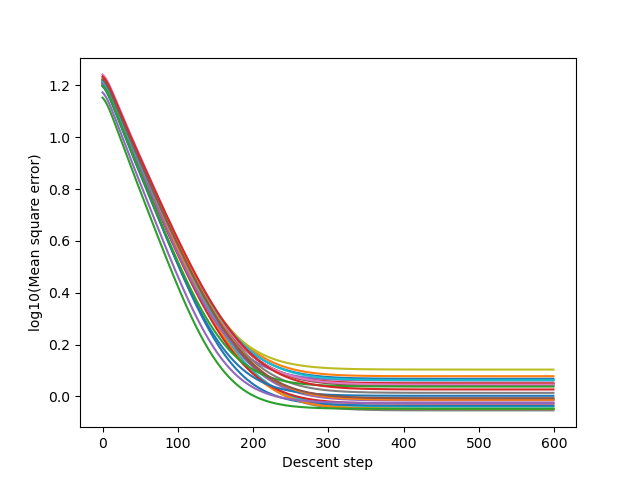

In [5]:
iq0 = ImageQuant2(img=imgs, roi=rois)
iq0.quantify(**kwargs_dict)
res0 = iq0.compile_res()
iq0.plot_losses(log=True)

### Quantification 1

  0%|                                                                                                                                                         | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                                | 1/600 [00:00<03:16,  3.05it/s]

  2%|██▏                                                                                                                                              | 9/600 [00:00<00:22, 25.93it/s]

  3%|████                                                                                                                                            | 17/600 [00:00<00:14, 41.07it/s]

  4%|██████                                                                                                                                          | 25/600 [00:00<00:11, 51.37it/s]

  6%|███████▉                                                                                                                                        | 33/600 [00:00<00:09, 58.80it/s]

  7%|█████████▌                                                                                                                                      | 40/600 [00:00<00:09, 60.75it/s]

  8%|███████████▎                                                                                                                                    | 47/600 [00:00<00:08, 62.03it/s]

  9%|████████████▉                                                                                                                                   | 54/600 [00:01<00:09, 60.45it/s]

 10%|██████████████▋                                                                                                                                 | 61/600 [00:01<00:08, 61.58it/s]

 11%|████████████████▎                                                                                                                               | 68/600 [00:01<00:08, 62.51it/s]

 12%|██████████████████                                                                                                                              | 75/600 [00:01<00:08, 63.74it/s]

 14%|███████████████████▋                                                                                                                            | 82/600 [00:01<00:08, 63.48it/s]

 15%|█████████████████████▌                                                                                                                          | 90/600 [00:01<00:07, 66.23it/s]

 16%|███████████████████████▎                                                                                                                        | 97/600 [00:01<00:07, 65.01it/s]

 17%|████████████████████████▊                                                                                                                      | 104/600 [00:01<00:07, 65.54it/s]

 18%|██████████████████████████▍                                                                                                                    | 111/600 [00:01<00:07, 63.62it/s]

 20%|████████████████████████████                                                                                                                   | 118/600 [00:02<00:07, 63.19it/s]

 21%|██████████████████████████████                                                                                                                 | 126/600 [00:02<00:07, 66.12it/s]

 22%|███████████████████████████████▉                                                                                                               | 134/600 [00:02<00:06, 68.27it/s]

 24%|█████████████████████████████████▌                                                                                                             | 141/600 [00:02<00:06, 66.42it/s]

 25%|███████████████████████████████████▌                                                                                                           | 149/600 [00:02<00:06, 68.31it/s]

 26%|█████████████████████████████████████▏                                                                                                         | 156/600 [00:02<00:07, 58.30it/s]

 27%|██████████████████████████████████████▊                                                                                                        | 163/600 [00:02<00:07, 56.82it/s]

 28%|████████████████████████████████████████▎                                                                                                      | 169/600 [00:02<00:08, 50.93it/s]

 29%|█████████████████████████████████████████▋                                                                                                     | 175/600 [00:03<00:09, 44.20it/s]

 30%|██████████████████████████████████████████▉                                                                                                    | 180/600 [00:03<00:09, 43.62it/s]

 31%|████████████████████████████████████████████                                                                                                   | 185/600 [00:03<00:10, 39.32it/s]

 32%|█████████████████████████████████████████████▌                                                                                                 | 191/600 [00:03<00:09, 43.95it/s]

 33%|██████████████████████████████████████████████▉                                                                                                | 197/600 [00:03<00:08, 47.68it/s]

 34%|████████████████████████████████████████████████▌                                                                                              | 204/600 [00:03<00:07, 52.86it/s]

 35%|██████████████████████████████████████████████████▌                                                                                            | 212/600 [00:03<00:06, 58.91it/s]

 36%|████████████████████████████████████████████████████▏                                                                                          | 219/600 [00:04<00:08, 47.61it/s]

 38%|█████████████████████████████████████████████████████▋                                                                                         | 225/600 [00:04<00:07, 49.76it/s]

 39%|███████████████████████████████████████████████████████▌                                                                                       | 233/600 [00:04<00:06, 56.59it/s]

 40%|█████████████████████████████████████████████████████████▋                                                                                     | 242/600 [00:04<00:05, 63.48it/s]

 42%|███████████████████████████████████████████████████████████▎                                                                                   | 249/600 [00:04<00:05, 64.64it/s]

 43%|█████████████████████████████████████████████████████████████                                                                                  | 256/600 [00:04<00:05, 65.49it/s]

 44%|██████████████████████████████████████████████████████████████▋                                                                                | 263/600 [00:04<00:05, 66.19it/s]

 45%|████████████████████████████████████████████████████████████████▌                                                                              | 271/600 [00:04<00:04, 67.54it/s]

 46%|██████████████████████████████████████████████████████████████████▎                                                                            | 278/600 [00:04<00:04, 68.15it/s]

 48%|███████████████████████████████████████████████████████████████████▉                                                                           | 285/600 [00:05<00:04, 67.62it/s]

 49%|█████████████████████████████████████████████████████████████████████▌                                                                         | 292/600 [00:05<00:04, 66.43it/s]

 50%|███████████████████████████████████████████████████████████████████████▌                                                                       | 300/600 [00:05<00:04, 70.07it/s]

 51%|█████████████████████████████████████████████████████████████████████████▍                                                                     | 308/600 [00:05<00:04, 72.27it/s]

 53%|███████████████████████████████████████████████████████████████████████████▎                                                                   | 316/600 [00:05<00:03, 71.53it/s]

 54%|█████████████████████████████████████████████████████████████████████████████▏                                                                 | 324/600 [00:05<00:03, 72.00it/s]

 55%|███████████████████████████████████████████████████████████████████████████████▏                                                               | 332/600 [00:05<00:03, 68.51it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████                                                              | 340/600 [00:05<00:03, 69.31it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▋                                                            | 347/600 [00:05<00:03, 69.36it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████▌                                                          | 355/600 [00:06<00:03, 69.95it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████▌                                                        | 363/600 [00:06<00:03, 69.94it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 371/600 [00:06<00:03, 70.04it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 379/600 [00:06<00:03, 70.65it/s]

 64%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 387/600 [00:06<00:02, 71.05it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 395/600 [00:06<00:02, 71.64it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████████████████                                               | 403/600 [00:06<00:02, 71.19it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 411/600 [00:06<00:02, 71.31it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 419/600 [00:06<00:02, 73.34it/s]

 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 428/600 [00:07<00:02, 76.09it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 436/600 [00:07<00:02, 76.71it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 444/600 [00:07<00:02, 76.61it/s]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 452/600 [00:07<00:01, 75.10it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 460/600 [00:07<00:01, 74.43it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 468/600 [00:07<00:01, 74.91it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 476/600 [00:07<00:01, 76.35it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 484/600 [00:07<00:01, 77.17it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 492/600 [00:07<00:01, 75.72it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 500/600 [00:07<00:01, 74.73it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 508/600 [00:08<00:01, 74.16it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 516/600 [00:08<00:01, 74.45it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 524/600 [00:08<00:01, 73.79it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 532/600 [00:08<00:00, 73.79it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 540/600 [00:08<00:00, 72.99it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 548/600 [00:08<00:00, 73.51it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 556/600 [00:08<00:00, 73.38it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 564/600 [00:08<00:00, 73.65it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 572/600 [00:08<00:00, 72.86it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 580/600 [00:09<00:00, 69.02it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 587/600 [00:09<00:00, 67.78it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 595/600 [00:09<00:00, 70.32it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 64.16it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

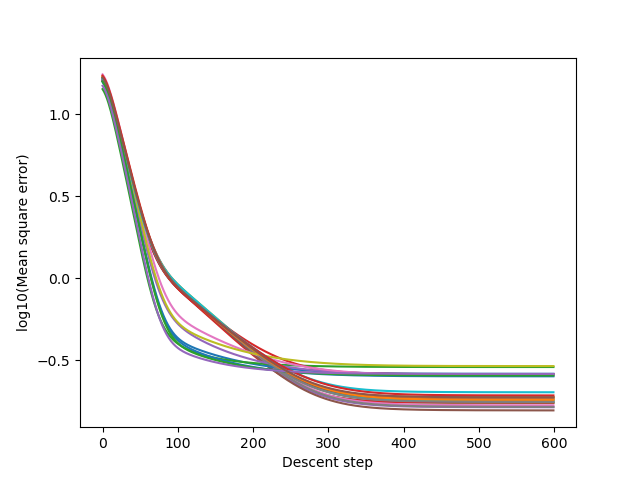

In [6]:
iq1 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg1)
iq1.quantify(**kwargs_dict)
res1 = iq1.compile_res()
iq1.plot_losses(log=True)

### Quantification 2

  0%|                                                                                                                                                         | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                                | 1/600 [00:00<03:36,  2.77it/s]

  2%|██▏                                                                                                                                              | 9/600 [00:00<00:24, 23.76it/s]

  3%|████▎                                                                                                                                           | 18/600 [00:00<00:14, 40.83it/s]

  4%|██████▏                                                                                                                                         | 26/600 [00:00<00:11, 50.93it/s]

  6%|████████▏                                                                                                                                       | 34/600 [00:00<00:09, 57.30it/s]

  7%|█████████▊                                                                                                                                      | 41/600 [00:00<00:09, 60.82it/s]

  8%|███████████▌                                                                                                                                    | 48/600 [00:01<00:08, 62.90it/s]

  9%|█████████████▏                                                                                                                                  | 55/600 [00:01<00:08, 64.54it/s]

 10%|██████████████▉                                                                                                                                 | 62/600 [00:01<00:08, 63.31it/s]

 12%|████████████████▌                                                                                                                               | 69/600 [00:01<00:08, 64.87it/s]

 13%|██████████████████▏                                                                                                                             | 76/600 [00:01<00:08, 63.26it/s]

 14%|████████████████████▏                                                                                                                           | 84/600 [00:01<00:07, 65.83it/s]

 15%|██████████████████████                                                                                                                          | 92/600 [00:01<00:07, 67.88it/s]

 17%|███████████████████████▊                                                                                                                       | 100/600 [00:01<00:07, 69.67it/s]

 18%|█████████████████████████▋                                                                                                                     | 108/600 [00:01<00:07, 70.20it/s]

 19%|███████████████████████████▋                                                                                                                   | 116/600 [00:02<00:06, 70.14it/s]

 21%|█████████████████████████████▌                                                                                                                 | 124/600 [00:02<00:06, 69.74it/s]

 22%|███████████████████████████████▏                                                                                                               | 131/600 [00:02<00:06, 69.46it/s]

 23%|█████████████████████████████████▏                                                                                                             | 139/600 [00:02<00:06, 70.33it/s]

 24%|███████████████████████████████████                                                                                                            | 147/600 [00:02<00:06, 70.56it/s]

 26%|████████████████████████████████████▉                                                                                                          | 155/600 [00:02<00:06, 72.54it/s]

 27%|██████████████████████████████████████▊                                                                                                        | 163/600 [00:02<00:05, 74.35it/s]

 28%|████████████████████████████████████████▊                                                                                                      | 171/600 [00:02<00:05, 73.20it/s]

 30%|██████████████████████████████████████████▋                                                                                                    | 179/600 [00:02<00:05, 72.01it/s]

 31%|████████████████████████████████████████████▌                                                                                                  | 187/600 [00:02<00:05, 72.41it/s]

 32%|██████████████████████████████████████████████▍                                                                                                | 195/600 [00:03<00:05, 70.93it/s]

 34%|████████████████████████████████████████████████▍                                                                                              | 203/600 [00:03<00:05, 69.80it/s]

 35%|██████████████████████████████████████████████████                                                                                             | 210/600 [00:03<00:05, 68.47it/s]

 36%|███████████████████████████████████████████████████▋                                                                                           | 217/600 [00:03<00:05, 68.20it/s]

 38%|█████████████████████████████████████████████████████▊                                                                                         | 226/600 [00:03<00:05, 72.22it/s]

 39%|███████████████████████████████████████████████████████▊                                                                                       | 234/600 [00:03<00:05, 72.32it/s]

 40%|█████████████████████████████████████████████████████████▋                                                                                     | 242/600 [00:03<00:04, 72.00it/s]

 42%|███████████████████████████████████████████████████████████▌                                                                                   | 250/600 [00:03<00:04, 71.20it/s]

 43%|█████████████████████████████████████████████████████████████▍                                                                                 | 258/600 [00:03<00:04, 70.27it/s]

 44%|███████████████████████████████████████████████████████████████▍                                                                               | 266/600 [00:04<00:04, 69.38it/s]

 46%|█████████████████████████████████████████████████████████████████                                                                              | 273/600 [00:04<00:04, 69.16it/s]

 47%|██████████████████████████████████████████████████████████████████▋                                                                            | 280/600 [00:04<00:04, 69.03it/s]

 48%|████████████████████████████████████████████████████████████████████▋                                                                          | 288/600 [00:04<00:04, 69.38it/s]

 49%|██████████████████████████████████████████████████████████████████████▎                                                                        | 295/600 [00:04<00:04, 67.99it/s]

 50%|████████████████████████████████████████████████████████████████████████▏                                                                      | 303/600 [00:04<00:04, 69.14it/s]

 52%|██████████████████████████████████████████████████████████████████████████                                                                     | 311/600 [00:04<00:04, 69.33it/s]

 53%|███████████████████████████████████████████████████████████████████████████▊                                                                   | 318/600 [00:04<00:04, 68.36it/s]

 54%|█████████████████████████████████████████████████████████████████████████████▍                                                                 | 325/600 [00:04<00:04, 68.37it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▎                                                               | 333/600 [00:05<00:03, 69.44it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████                                                              | 340/600 [00:05<00:03, 68.61it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▋                                                            | 347/600 [00:05<00:03, 64.82it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████▌                                                          | 355/600 [00:05<00:03, 67.66it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████▌                                                        | 363/600 [00:05<00:03, 70.15it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 371/600 [00:05<00:03, 69.18it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████████                                                     | 378/600 [00:05<00:03, 68.83it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 385/600 [00:05<00:03, 66.50it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 392/600 [00:05<00:03, 66.57it/s]

 66%|███████████████████████████████████████████████████████████████████████████████████████████████                                                | 399/600 [00:06<00:03, 65.78it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 406/600 [00:06<00:02, 66.43it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 414/600 [00:06<00:02, 67.71it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 421/600 [00:06<00:02, 68.20it/s]

 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 428/600 [00:06<00:02, 68.60it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 436/600 [00:06<00:02, 69.62it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 444/600 [00:06<00:02, 70.42it/s]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 452/600 [00:06<00:02, 72.07it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 460/600 [00:06<00:01, 72.99it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 468/600 [00:07<00:01, 67.30it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 475/600 [00:07<00:01, 65.51it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 483/600 [00:07<00:01, 67.10it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 492/600 [00:07<00:01, 70.93it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 500/600 [00:07<00:01, 73.04it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 508/600 [00:07<00:01, 72.17it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 516/600 [00:07<00:01, 71.58it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 524/600 [00:07<00:01, 71.04it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 532/600 [00:07<00:01, 66.40it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 539/600 [00:08<00:00, 63.97it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 546/600 [00:08<00:00, 63.43it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 553/600 [00:08<00:00, 63.43it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 560/600 [00:08<00:00, 63.74it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 567/600 [00:08<00:00, 62.16it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 574/600 [00:08<00:00, 60.78it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 581/600 [00:08<00:00, 63.05it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 590/600 [00:08<00:00, 68.02it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 598/600 [00:09<00:00, 69.96it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 66.42it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

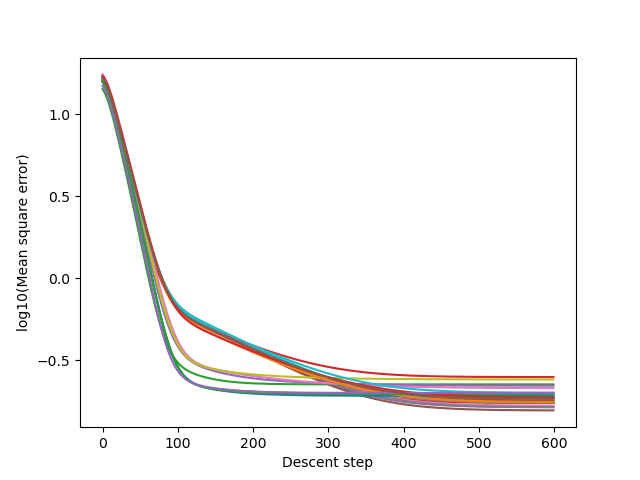

In [7]:
iq2 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg2)
iq2.quantify(**kwargs_dict)
res2 = iq2.compile_res()
iq2.plot_losses(log=True)

### Quantification 3

  0%|                                                                                                                                                         | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                                | 1/600 [00:00<03:13,  3.09it/s]

  1%|█▉                                                                                                                                               | 8/600 [00:00<00:25, 23.51it/s]

  2%|███▌                                                                                                                                            | 15/600 [00:00<00:15, 37.35it/s]

  4%|█████▎                                                                                                                                          | 22/600 [00:00<00:12, 47.05it/s]

  5%|██████▉                                                                                                                                         | 29/600 [00:00<00:10, 52.08it/s]

  6%|████████▋                                                                                                                                       | 36/600 [00:00<00:09, 57.15it/s]

  7%|██████████▌                                                                                                                                     | 44/600 [00:00<00:08, 61.78it/s]

  9%|████████████▍                                                                                                                                   | 52/600 [00:01<00:08, 65.03it/s]

 10%|██████████████▏                                                                                                                                 | 59/600 [00:01<00:08, 63.14it/s]

 11%|███████████████▊                                                                                                                                | 66/600 [00:01<00:08, 62.39it/s]

 12%|█████████████████▌                                                                                                                              | 73/600 [00:01<00:08, 61.97it/s]

 13%|███████████████████▏                                                                                                                            | 80/600 [00:01<00:08, 63.56it/s]

 14%|████████████████████▉                                                                                                                           | 87/600 [00:01<00:07, 64.98it/s]

 16%|██████████████████████▌                                                                                                                         | 94/600 [00:01<00:07, 65.39it/s]

 17%|████████████████████████                                                                                                                       | 101/600 [00:01<00:07, 64.50it/s]

 18%|█████████████████████████▋                                                                                                                     | 108/600 [00:01<00:07, 65.71it/s]

 19%|███████████████████████████▋                                                                                                                   | 116/600 [00:02<00:07, 67.60it/s]

 20%|█████████████████████████████▎                                                                                                                 | 123/600 [00:02<00:06, 68.25it/s]

 22%|██████████████████████████████▉                                                                                                                | 130/600 [00:02<00:06, 68.43it/s]

 23%|████████████████████████████████▋                                                                                                              | 137/600 [00:02<00:06, 68.84it/s]

 24%|██████████████████████████████████▎                                                                                                            | 144/600 [00:02<00:06, 68.44it/s]

 25%|███████████████████████████████████▉                                                                                                           | 151/600 [00:02<00:06, 68.81it/s]

 26%|█████████████████████████████████████▋                                                                                                         | 158/600 [00:02<00:06, 69.08it/s]

 28%|███████████████████████████████████████▌                                                                                                       | 166/600 [00:02<00:06, 69.61it/s]

 29%|█████████████████████████████████████████▏                                                                                                     | 173/600 [00:02<00:06, 69.53it/s]

 30%|███████████████████████████████████████████▏                                                                                                   | 181/600 [00:02<00:05, 70.95it/s]

 32%|█████████████████████████████████████████████                                                                                                  | 189/600 [00:03<00:09, 45.44it/s]

 33%|██████████████████████████████████████████████▉                                                                                                | 197/600 [00:03<00:07, 51.37it/s]

 34%|████████████████████████████████████████████████▊                                                                                              | 205/600 [00:03<00:06, 56.45it/s]

 35%|██████████████████████████████████████████████████▌                                                                                            | 212/600 [00:03<00:06, 59.34it/s]

 37%|████████████████████████████████████████████████████▍                                                                                          | 220/600 [00:03<00:06, 62.85it/s]

 38%|██████████████████████████████████████████████████████▎                                                                                        | 228/600 [00:03<00:05, 65.89it/s]

 39%|████████████████████████████████████████████████████████▏                                                                                      | 236/600 [00:03<00:05, 67.66it/s]

 41%|██████████████████████████████████████████████████████████▏                                                                                    | 244/600 [00:04<00:05, 66.06it/s]

 42%|████████████████████████████████████████████████████████████                                                                                   | 252/600 [00:04<00:05, 68.22it/s]

 43%|█████████████████████████████████████████████████████████████▉                                                                                 | 260/600 [00:04<00:04, 70.38it/s]

 45%|███████████████████████████████████████████████████████████████▊                                                                               | 268/600 [00:04<00:04, 72.22it/s]

 46%|█████████████████████████████████████████████████████████████████▊                                                                             | 276/600 [00:04<00:04, 70.71it/s]

 47%|███████████████████████████████████████████████████████████████████▋                                                                           | 284/600 [00:04<00:04, 69.35it/s]

 49%|█████████████████████████████████████████████████████████████████████▌                                                                         | 292/600 [00:04<00:04, 69.38it/s]

 50%|███████████████████████████████████████████████████████████████████████▎                                                                       | 299/600 [00:04<00:04, 68.60it/s]

 51%|████████████████████████████████████████████████████████████████████████▉                                                                      | 306/600 [00:04<00:04, 67.78it/s]

 52%|██████████████████████████████████████████████████████████████████████████▊                                                                    | 314/600 [00:05<00:04, 70.08it/s]

 54%|████████████████████████████████████████████████████████████████████████████▋                                                                  | 322/600 [00:05<00:03, 71.45it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▋                                                                | 330/600 [00:05<00:05, 53.14it/s]

 56%|████████████████████████████████████████████████████████████████████████████████▎                                                              | 337/600 [00:05<00:08, 32.04it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████▌                                                             | 342/600 [00:06<00:10, 24.56it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▍                                                            | 346/600 [00:06<00:13, 19.33it/s]

 58%|███████████████████████████████████████████████████████████████████████████████████▍                                                           | 350/600 [00:06<00:13, 18.56it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████▏                                                          | 353/600 [00:07<00:13, 18.06it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████▊                                                          | 356/600 [00:07<00:12, 19.58it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▌                                                         | 359/600 [00:07<00:11, 20.72it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████▎                                                        | 362/600 [00:07<00:11, 21.46it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▉                                                        | 365/600 [00:07<00:11, 20.55it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▉                                                       | 369/600 [00:07<00:09, 23.10it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 372/600 [00:07<00:09, 24.35it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 377/600 [00:07<00:07, 29.04it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 381/600 [00:08<00:07, 29.13it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 385/600 [00:08<00:07, 27.40it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 389/600 [00:08<00:07, 30.04it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 393/600 [00:08<00:07, 29.50it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 397/600 [00:08<00:07, 27.87it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 400/600 [00:08<00:08, 24.24it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████████████████                                               | 403/600 [00:08<00:09, 21.55it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 406/600 [00:09<00:09, 20.25it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 409/600 [00:09<00:09, 19.22it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 411/600 [00:09<00:09, 19.26it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 414/600 [00:09<00:09, 20.22it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 418/600 [00:09<00:07, 24.24it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 422/600 [00:09<00:06, 27.74it/s]

 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 428/600 [00:09<00:04, 35.69it/s]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 433/600 [00:09<00:04, 36.51it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 437/600 [00:10<00:04, 33.87it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 441/600 [00:10<00:04, 33.67it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 447/600 [00:10<00:03, 39.17it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 453/600 [00:10<00:03, 43.86it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 459/600 [00:10<00:03, 46.10it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 466/600 [00:10<00:02, 50.73it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 473/600 [00:10<00:02, 53.98it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 481/600 [00:10<00:02, 59.29it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 487/600 [00:11<00:01, 57.21it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 494/600 [00:11<00:01, 59.82it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 501/600 [00:11<00:01, 60.60it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 508/600 [00:11<00:01, 60.48it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 515/600 [00:11<00:01, 58.72it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 522/600 [00:11<00:01, 60.56it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 529/600 [00:11<00:01, 60.52it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 536/600 [00:11<00:01, 60.74it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 544/600 [00:11<00:00, 65.62it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 552/600 [00:12<00:00, 69.31it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 559/600 [00:12<00:00, 67.02it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 566/600 [00:12<00:00, 64.04it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 573/600 [00:12<00:00, 58.97it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 580/600 [00:12<00:00, 58.10it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 586/600 [00:12<00:00, 55.88it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 593/600 [00:12<00:00, 58.52it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:12<00:00, 59.80it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:12<00:00, 46.56it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

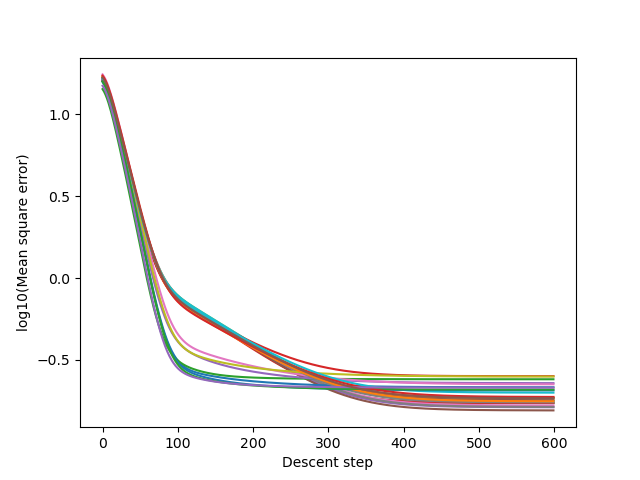

In [8]:
iq3 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg3)
iq3.quantify(**kwargs_dict)
res3 = iq3.compile_res()
iq3.plot_losses(log=True)

### Quantification 4

  0%|                                                                                                                                                         | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                                | 1/600 [00:00<04:01,  2.48it/s]

  1%|█▉                                                                                                                                               | 8/600 [00:00<00:32, 18.12it/s]

  2%|███▎                                                                                                                                            | 14/600 [00:00<00:20, 28.64it/s]

  3%|████▌                                                                                                                                           | 19/600 [00:00<00:17, 33.07it/s]

  4%|█████▊                                                                                                                                          | 24/600 [00:00<00:16, 35.32it/s]

  5%|███████▍                                                                                                                                        | 31/600 [00:00<00:13, 42.90it/s]

  6%|█████████                                                                                                                                       | 38/600 [00:01<00:11, 48.63it/s]

  8%|███████████                                                                                                                                     | 46/600 [00:01<00:10, 54.97it/s]

  9%|████████████▍                                                                                                                                   | 52/600 [00:01<00:10, 52.05it/s]

 10%|█████████████▉                                                                                                                                  | 58/600 [00:01<00:10, 53.19it/s]

 11%|███████████████▎                                                                                                                                | 64/600 [00:01<00:10, 52.36it/s]

 12%|█████████████████                                                                                                                               | 71/600 [00:01<00:09, 55.97it/s]

 13%|██████████████████▍                                                                                                                             | 77/600 [00:01<00:09, 55.52it/s]

 14%|███████████████████▉                                                                                                                            | 83/600 [00:01<00:10, 50.90it/s]

 15%|█████████████████████▎                                                                                                                          | 89/600 [00:02<00:09, 51.68it/s]

 16%|██████████████████████▊                                                                                                                         | 95/600 [00:02<00:10, 49.93it/s]

 17%|████████████████████████                                                                                                                       | 101/600 [00:02<00:09, 50.08it/s]

 18%|█████████████████████████▌                                                                                                                     | 107/600 [00:02<00:09, 51.35it/s]

 19%|███████████████████████████▏                                                                                                                   | 114/600 [00:02<00:08, 54.20it/s]

 20%|████████████████████████████▊                                                                                                                  | 121/600 [00:02<00:08, 57.02it/s]

 21%|██████████████████████████████▌                                                                                                                | 128/600 [00:02<00:08, 58.97it/s]

 22%|███████████████████████████████▉                                                                                                               | 134/600 [00:02<00:08, 54.24it/s]

 23%|█████████████████████████████████▎                                                                                                             | 140/600 [00:03<00:09, 47.57it/s]

 24%|███████████████████████████████████                                                                                                            | 147/600 [00:03<00:08, 51.33it/s]

 26%|████████████████████████████████████▋                                                                                                          | 154/600 [00:03<00:08, 54.28it/s]

 27%|██████████████████████████████████████▎                                                                                                        | 161/600 [00:03<00:07, 57.54it/s]

 28%|████████████████████████████████████████                                                                                                       | 168/600 [00:03<00:07, 59.73it/s]

 29%|█████████████████████████████████████████▋                                                                                                     | 175/600 [00:03<00:07, 57.91it/s]

 30%|███████████████████████████████████████████▏                                                                                                   | 181/600 [00:03<00:07, 55.68it/s]

 31%|████████████████████████████████████████████▌                                                                                                  | 187/600 [00:03<00:07, 53.96it/s]

 32%|█████████████████████████████████████████████▉                                                                                                 | 193/600 [00:03<00:07, 53.29it/s]

 33%|███████████████████████████████████████████████▍                                                                                               | 199/600 [00:04<00:07, 53.43it/s]

 34%|████████████████████████████████████████████████▊                                                                                              | 205/600 [00:04<00:07, 51.99it/s]

 35%|██████████████████████████████████████████████████▎                                                                                            | 211/600 [00:04<00:07, 50.78it/s]

 36%|███████████████████████████████████████████████████▉                                                                                           | 218/600 [00:04<00:07, 53.96it/s]

 37%|█████████████████████████████████████████████████████▍                                                                                         | 224/600 [00:04<00:06, 53.72it/s]

 38%|██████████████████████████████████████████████████████▊                                                                                        | 230/600 [00:04<00:07, 52.45it/s]

 39%|████████████████████████████████████████████████████████▏                                                                                      | 236/600 [00:04<00:06, 53.97it/s]

 40%|█████████████████████████████████████████████████████████▋                                                                                     | 242/600 [00:04<00:06, 52.71it/s]

 41%|███████████████████████████████████████████████████████████                                                                                    | 248/600 [00:05<00:06, 51.21it/s]

 42%|████████████████████████████████████████████████████████████▌                                                                                  | 254/600 [00:05<00:06, 52.50it/s]

 43%|█████████████████████████████████████████████████████████████▉                                                                                 | 260/600 [00:05<00:06, 53.61it/s]

 44%|███████████████████████████████████████████████████████████████▍                                                                               | 266/600 [00:05<00:06, 50.81it/s]

 45%|████████████████████████████████████████████████████████████████▊                                                                              | 272/600 [00:05<00:06, 49.54it/s]

 46%|██████████████████████████████████████████████████████████████████▎                                                                            | 278/600 [00:05<00:06, 49.00it/s]

 47%|███████████████████████████████████████████████████████████████████▍                                                                           | 283/600 [00:05<00:06, 47.61it/s]

 48%|████████████████████████████████████████████████████████████████████▉                                                                          | 289/600 [00:05<00:06, 50.18it/s]

 50%|██████████████████████████████████████████████████████████████████████▊                                                                        | 297/600 [00:05<00:05, 57.59it/s]

 51%|████████████████████████████████████████████████████████████████████████▋                                                                      | 305/600 [00:06<00:04, 61.60it/s]

 52%|██████████████████████████████████████████████████████████████████████████▎                                                                    | 312/600 [00:06<00:04, 62.74it/s]

 53%|████████████████████████████████████████████████████████████████████████████                                                                   | 319/600 [00:06<00:04, 57.95it/s]

 54%|█████████████████████████████████████████████████████████████████████████████▍                                                                 | 325/600 [00:06<00:05, 52.60it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▉                                                                | 331/600 [00:06<00:04, 54.23it/s]

 56%|████████████████████████████████████████████████████████████████████████████████▊                                                              | 339/600 [00:06<00:04, 60.04it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▋                                                            | 347/600 [00:06<00:03, 65.11it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████▎                                                          | 354/600 [00:06<00:04, 60.60it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████                                                         | 361/600 [00:07<00:04, 55.70it/s]

 61%|███████████████████████████████████████████████████████████████████████████████████████▍                                                       | 367/600 [00:07<00:04, 56.36it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 375/600 [00:07<00:03, 61.71it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████                                                    | 382/600 [00:07<00:03, 63.39it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 389/600 [00:07<00:03, 60.89it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 396/600 [00:07<00:03, 56.97it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 402/600 [00:07<00:03, 55.86it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 410/600 [00:07<00:03, 60.45it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 418/600 [00:07<00:02, 63.43it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 425/600 [00:08<00:02, 60.97it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 432/600 [00:08<00:02, 61.24it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 439/600 [00:08<00:02, 57.49it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 445/600 [00:08<00:02, 55.06it/s]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 451/600 [00:08<00:02, 53.44it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 457/600 [00:08<00:02, 52.19it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 463/600 [00:08<00:02, 51.61it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 469/600 [00:08<00:02, 51.67it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 475/600 [00:09<00:02, 51.64it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 484/600 [00:09<00:01, 61.03it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 492/600 [00:09<00:01, 63.79it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 500/600 [00:09<00:01, 67.06it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 507/600 [00:09<00:01, 66.73it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 514/600 [00:09<00:01, 62.36it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 521/600 [00:09<00:01, 60.19it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 528/600 [00:09<00:01, 57.71it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 534/600 [00:09<00:01, 56.97it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 540/600 [00:10<00:01, 56.41it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 546/600 [00:10<00:00, 57.37it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 554/600 [00:10<00:00, 62.65it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 563/600 [00:10<00:00, 68.42it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 571/600 [00:10<00:00, 70.16it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 579/600 [00:10<00:00, 71.74it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 587/600 [00:10<00:00, 73.75it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 595/600 [00:10<00:00, 72.15it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:10<00:00, 55.01it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

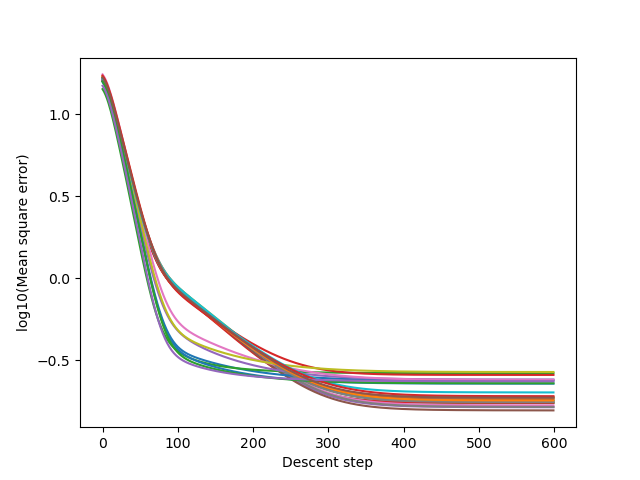

In [9]:
iq4 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg4)
iq4.quantify(**kwargs_dict)
res4 = iq4.compile_res()
iq4.plot_losses(log=True)

### Quantification 5

  0%|                                                                                                                                                         | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                                | 1/600 [00:00<03:06,  3.21it/s]

  1%|█▉                                                                                                                                               | 8/600 [00:00<00:24, 24.11it/s]

  2%|███▌                                                                                                                                            | 15/600 [00:00<00:15, 36.97it/s]

  4%|█████                                                                                                                                           | 21/600 [00:00<00:13, 43.08it/s]

  5%|██████▋                                                                                                                                         | 28/600 [00:00<00:11, 50.08it/s]

  6%|████████▍                                                                                                                                       | 35/600 [00:00<00:10, 55.90it/s]

  7%|██████████▎                                                                                                                                     | 43/600 [00:00<00:09, 60.70it/s]

  8%|████████████                                                                                                                                    | 50/600 [00:01<00:08, 63.23it/s]

 10%|█████████████▋                                                                                                                                  | 57/600 [00:01<00:08, 64.66it/s]

 11%|███████████████▎                                                                                                                                | 64/600 [00:01<00:08, 61.37it/s]

 12%|█████████████████                                                                                                                               | 71/600 [00:01<00:09, 57.98it/s]

 13%|██████████████████▍                                                                                                                             | 77/600 [00:01<00:09, 56.78it/s]

 14%|███████████████████▉                                                                                                                            | 83/600 [00:01<00:09, 55.32it/s]

 15%|█████████████████████▌                                                                                                                          | 90/600 [00:01<00:08, 57.04it/s]

 16%|███████████████████████▎                                                                                                                        | 97/600 [00:01<00:08, 59.33it/s]

 17%|████████████████████████▌                                                                                                                      | 103/600 [00:01<00:08, 58.70it/s]

 18%|█████████████████████████▉                                                                                                                     | 109/600 [00:02<00:08, 57.93it/s]

 19%|███████████████████████████▍                                                                                                                   | 115/600 [00:02<00:08, 55.66it/s]

 20%|████████████████████████████▊                                                                                                                  | 121/600 [00:02<00:08, 55.54it/s]

 21%|██████████████████████████████▎                                                                                                                | 127/600 [00:02<00:08, 53.88it/s]

 22%|███████████████████████████████▋                                                                                                               | 133/600 [00:02<00:08, 52.17it/s]

 23%|█████████████████████████████████▏                                                                                                             | 139/600 [00:02<00:08, 53.48it/s]

 24%|███████████████████████████████████                                                                                                            | 147/600 [00:02<00:07, 59.44it/s]

 26%|████████████████████████████████████▉                                                                                                          | 155/600 [00:02<00:06, 64.25it/s]

 27%|██████████████████████████████████████▌                                                                                                        | 162/600 [00:02<00:06, 62.65it/s]

 28%|████████████████████████████████████████▎                                                                                                      | 169/600 [00:03<00:06, 62.19it/s]

 29%|█████████████████████████████████████████▉                                                                                                     | 176/600 [00:03<00:07, 57.04it/s]

 30%|███████████████████████████████████████████▍                                                                                                   | 182/600 [00:03<00:07, 55.33it/s]

 31%|████████████████████████████████████████████▊                                                                                                  | 188/600 [00:03<00:07, 52.94it/s]

 32%|██████████████████████████████████████████████▏                                                                                                | 194/600 [00:03<00:07, 52.33it/s]

 34%|███████████████████████████████████████████████▉                                                                                               | 201/600 [00:03<00:07, 55.08it/s]

 35%|█████████████████████████████████████████████████▌                                                                                             | 208/600 [00:03<00:06, 57.70it/s]

 36%|███████████████████████████████████████████████████▏                                                                                           | 215/600 [00:03<00:06, 59.80it/s]

 37%|████████████████████████████████████████████████████▉                                                                                          | 222/600 [00:04<00:06, 59.88it/s]

 38%|██████████████████████████████████████████████████████▌                                                                                        | 229/600 [00:04<00:06, 54.79it/s]

 39%|████████████████████████████████████████████████████████                                                                                       | 235/600 [00:04<00:06, 52.85it/s]

 40%|█████████████████████████████████████████████████████████▋                                                                                     | 242/600 [00:04<00:06, 56.22it/s]

 41%|███████████████████████████████████████████████████████████                                                                                    | 248/600 [00:04<00:06, 56.51it/s]

 42%|████████████████████████████████████████████████████████████▌                                                                                  | 254/600 [00:04<00:06, 54.95it/s]

 43%|█████████████████████████████████████████████████████████████▉                                                                                 | 260/600 [00:04<00:06, 54.16it/s]

 44%|███████████████████████████████████████████████████████████████▍                                                                               | 266/600 [00:04<00:06, 52.91it/s]

 45%|████████████████████████████████████████████████████████████████▊                                                                              | 272/600 [00:05<00:06, 53.34it/s]

 46%|██████████████████████████████████████████████████████████████████▎                                                                            | 278/600 [00:05<00:06, 53.26it/s]

 47%|███████████████████████████████████████████████████████████████████▋                                                                           | 284/600 [00:05<00:05, 53.61it/s]

 48%|█████████████████████████████████████████████████████████████████████                                                                          | 290/600 [00:05<00:05, 54.66it/s]

 50%|██████████████████████████████████████████████████████████████████████▊                                                                        | 297/600 [00:05<00:05, 57.74it/s]

 51%|████████████████████████████████████████████████████████████████████████▍                                                                      | 304/600 [00:05<00:04, 60.55it/s]

 52%|██████████████████████████████████████████████████████████████████████████                                                                     | 311/600 [00:05<00:04, 62.52it/s]

 53%|███████████████████████████████████████████████████████████████████████████▊                                                                   | 318/600 [00:05<00:04, 62.93it/s]

 54%|█████████████████████████████████████████████████████████████████████████████▍                                                                 | 325/600 [00:05<00:04, 62.27it/s]

 55%|███████████████████████████████████████████████████████████████████████████████▏                                                               | 332/600 [00:05<00:04, 61.23it/s]

 56%|████████████████████████████████████████████████████████████████████████████████▊                                                              | 339/600 [00:06<00:04, 62.42it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▍                                                            | 346/600 [00:06<00:04, 58.22it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▉                                                           | 352/600 [00:06<00:04, 56.70it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▎                                                         | 358/600 [00:06<00:04, 55.08it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▊                                                        | 364/600 [00:06<00:04, 51.03it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 370/600 [00:06<00:04, 50.08it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 376/600 [00:06<00:04, 47.31it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████                                                    | 382/600 [00:06<00:04, 50.43it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 388/600 [00:07<00:04, 49.83it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 394/600 [00:07<00:04, 44.19it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 400/600 [00:07<00:04, 47.09it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 406/600 [00:07<00:04, 48.48it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 413/600 [00:07<00:03, 51.94it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 419/600 [00:07<00:04, 41.80it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 427/600 [00:07<00:03, 48.59it/s]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 434/600 [00:08<00:03, 53.16it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 441/600 [00:08<00:02, 55.95it/s]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 449/600 [00:08<00:02, 60.14it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 457/600 [00:08<00:02, 64.07it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 465/600 [00:08<00:02, 67.32it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 473/600 [00:08<00:01, 69.73it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 481/600 [00:08<00:01, 71.60it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 489/600 [00:08<00:01, 72.75it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 497/600 [00:08<00:01, 72.73it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 505/600 [00:09<00:01, 73.65it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 514/600 [00:09<00:01, 77.66it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 523/600 [00:09<00:00, 79.25it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 532/600 [00:09<00:00, 80.34it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 541/600 [00:09<00:00, 79.16it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 549/600 [00:09<00:00, 78.47it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 558/600 [00:09<00:00, 79.55it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 567/600 [00:09<00:00, 81.52it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 576/600 [00:09<00:00, 82.22it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 585/600 [00:09<00:00, 79.88it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 594/600 [00:10<00:00, 80.81it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:10<00:00, 58.96it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

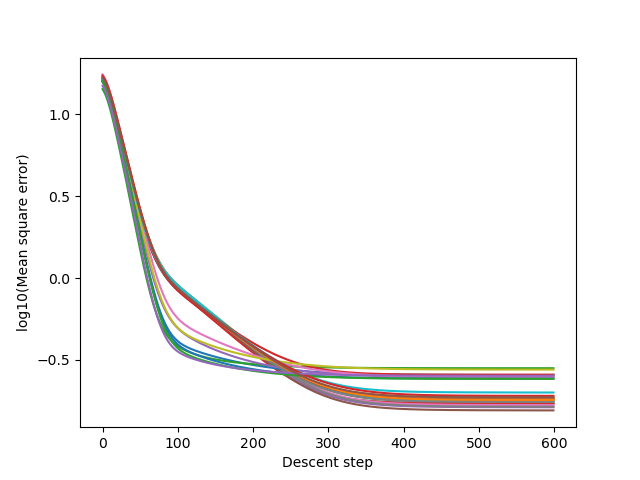

In [10]:
iq5 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg5)
iq5.quantify(**kwargs_dict)
res5 = iq5.compile_res()
iq5.plot_losses(log=True)

### Quantification 6

  0%|                                                                                                                                                         | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                                | 1/600 [00:00<03:00,  3.32it/s]

  2%|██▍                                                                                                                                             | 10/600 [00:00<00:19, 30.17it/s]

  3%|████▌                                                                                                                                           | 19/600 [00:00<00:12, 47.44it/s]

  5%|██████▋                                                                                                                                         | 28/600 [00:00<00:09, 58.31it/s]

  6%|████████▉                                                                                                                                       | 37/600 [00:00<00:08, 65.39it/s]

  8%|██████████▊                                                                                                                                     | 45/600 [00:00<00:08, 64.48it/s]

  9%|████████████▋                                                                                                                                   | 53/600 [00:01<00:09, 55.92it/s]

 10%|██████████████▍                                                                                                                                 | 60/600 [00:01<00:09, 55.16it/s]

 11%|████████████████                                                                                                                                | 67/600 [00:01<00:09, 57.21it/s]

 12%|██████████████████                                                                                                                              | 75/600 [00:01<00:08, 62.71it/s]

 14%|███████████████████▉                                                                                                                            | 83/600 [00:01<00:07, 66.51it/s]

 15%|█████████████████████▊                                                                                                                          | 91/600 [00:01<00:07, 69.92it/s]

 16%|███████████████████████▊                                                                                                                        | 99/600 [00:01<00:06, 71.91it/s]

 18%|█████████████████████████▌                                                                                                                     | 107/600 [00:01<00:07, 69.06it/s]

 19%|███████████████████████████▍                                                                                                                   | 115/600 [00:01<00:07, 68.18it/s]

 20%|█████████████████████████████▎                                                                                                                 | 123/600 [00:02<00:06, 68.82it/s]

 22%|██████████████████████████████▉                                                                                                                | 130/600 [00:02<00:06, 67.28it/s]

 23%|████████████████████████████████▉                                                                                                              | 138/600 [00:02<00:06, 70.73it/s]

 24%|██████████████████████████████████▊                                                                                                            | 146/600 [00:02<00:06, 72.17it/s]

 26%|████████████████████████████████████▋                                                                                                          | 154/600 [00:02<00:07, 57.85it/s]

 27%|██████████████████████████████████████▎                                                                                                        | 161/600 [00:02<00:07, 57.65it/s]

 28%|████████████████████████████████████████                                                                                                       | 168/600 [00:02<00:07, 57.93it/s]

 29%|█████████████████████████████████████████▋                                                                                                     | 175/600 [00:02<00:07, 58.58it/s]

 30%|███████████████████████████████████████████▌                                                                                                   | 183/600 [00:03<00:06, 63.04it/s]

 32%|█████████████████████████████████████████████▎                                                                                                 | 190/600 [00:03<00:06, 64.39it/s]

 33%|██████████████████████████████████████████████▉                                                                                                | 197/600 [00:03<00:06, 64.31it/s]

 34%|████████████████████████████████████████████████▊                                                                                              | 205/600 [00:03<00:05, 67.10it/s]

 36%|███████████████████████████████████████████████████                                                                                            | 214/600 [00:03<00:05, 72.00it/s]

 37%|████████████████████████████████████████████████████▉                                                                                          | 222/600 [00:03<00:05, 72.95it/s]

 38%|██████████████████████████████████████████████████████▊                                                                                        | 230/600 [00:03<00:05, 71.67it/s]

 40%|████████████████████████████████████████████████████████▋                                                                                      | 238/600 [00:03<00:04, 73.00it/s]

 41%|██████████████████████████████████████████████████████████▋                                                                                    | 246/600 [00:03<00:04, 74.34it/s]

 42%|████████████████████████████████████████████████████████████▌                                                                                  | 254/600 [00:04<00:04, 75.25it/s]

 44%|██████████████████████████████████████████████████████████████▍                                                                                | 262/600 [00:04<00:04, 75.95it/s]

 45%|████████████████████████████████████████████████████████████████▎                                                                              | 270/600 [00:04<00:04, 76.34it/s]

 46%|██████████████████████████████████████████████████████████████████▎                                                                            | 278/600 [00:04<00:04, 77.09it/s]

 48%|████████████████████████████████████████████████████████████████████▏                                                                          | 286/600 [00:04<00:04, 76.51it/s]

 49%|██████████████████████████████████████████████████████████████████████                                                                         | 294/600 [00:04<00:04, 74.33it/s]

 50%|███████████████████████████████████████████████████████████████████████▉                                                                       | 302/600 [00:04<00:04, 73.43it/s]

 52%|█████████████████████████████████████████████████████████████████████████▉                                                                     | 310/600 [00:04<00:03, 73.49it/s]

 53%|███████████████████████████████████████████████████████████████████████████▊                                                                   | 318/600 [00:04<00:03, 74.55it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▉                                                                 | 327/600 [00:04<00:03, 77.27it/s]

 56%|████████████████████████████████████████████████████████████████████████████████                                                               | 336/600 [00:05<00:03, 79.08it/s]

 57%|██████████████████████████████████████████████████████████████████████████████████▏                                                            | 345/600 [00:05<00:03, 80.10it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████▎                                                          | 354/600 [00:05<00:03, 78.40it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████▌                                                        | 363/600 [00:05<00:02, 79.87it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 371/600 [00:05<00:02, 79.33it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 379/600 [00:05<00:02, 77.12it/s]

 64%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 387/600 [00:05<00:02, 76.67it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 395/600 [00:05<00:02, 73.25it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████████████████                                               | 403/600 [00:05<00:02, 70.83it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 411/600 [00:06<00:02, 70.64it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 419/600 [00:06<00:02, 68.29it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 426/600 [00:06<00:04, 42.55it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 432/600 [00:06<00:04, 40.76it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 437/600 [00:06<00:03, 41.79it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 442/600 [00:06<00:03, 42.22it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 447/600 [00:07<00:03, 42.67it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 455/600 [00:07<00:02, 50.81it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 463/600 [00:07<00:02, 57.85it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 470/600 [00:07<00:02, 60.18it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 477/600 [00:07<00:01, 62.48it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 484/600 [00:07<00:01, 64.11it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 491/600 [00:07<00:01, 65.43it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 499/600 [00:07<00:01, 67.82it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 507/600 [00:07<00:01, 69.40it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 516/600 [00:08<00:01, 74.11it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 524/600 [00:08<00:01, 74.85it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 532/600 [00:08<00:00, 74.70it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 540/600 [00:08<00:00, 74.58it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 548/600 [00:08<00:00, 71.03it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 556/600 [00:08<00:00, 68.66it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 564/600 [00:08<00:00, 70.13it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 572/600 [00:08<00:00, 72.01it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 581/600 [00:08<00:00, 75.09it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 589/600 [00:08<00:00, 75.58it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 597/600 [00:09<00:00, 76.49it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 65.65it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

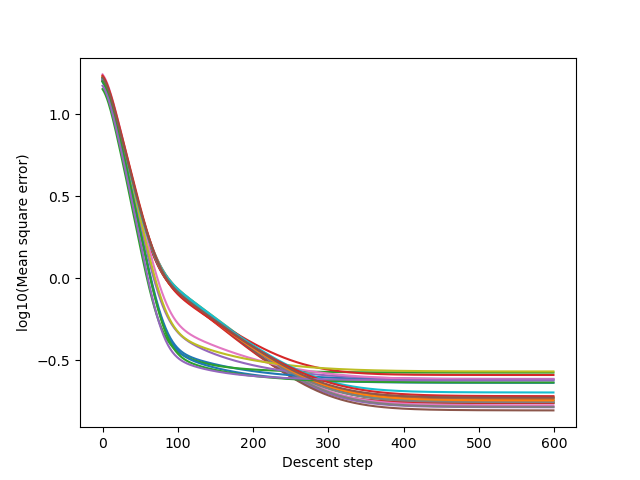

In [11]:
iq6 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg6)
iq6.quantify(**kwargs_dict)
res6 = iq6.compile_res()
iq6.plot_losses(log=True)

### Get calibrations

In [12]:
def calculate_calibration(res):
    mems = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Membrane signal']))
    cyts = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Cytoplasmic signal']))
    pre_post = [p.split('/')[-1] for p in paths]
    embryos = [p.split('/')[-2] for p in paths]
    lines = [p.split('/')[-3].split('_')[1] for p in paths]

    df_dict = {'Line': lines, 'Embryo': embryos, 'Exposure': pre_post, 'Membrane': mems, 'Cytoplasm': cyts}
    df = pd.DataFrame(df_dict)

    pre = df.groupby(['Line', 'Embryo']).last()
    post = df.groupby(['Line', 'Embryo']).first()
    df = pd.DataFrame({'mem_pre': pre.Membrane, 
                       'mem_post': post.Membrane, 'cyt_pre': pre.Cytoplasm, 
                       'cyt_post': post.Cytoplasm})
    df.to_csv('temp.csv')
    df = pd.read_csv('temp.csv')
    os.remove('temp.csv')
    return df

In [13]:
df0 = calculate_calibration(res0)
df1 = calculate_calibration(res1)
df2 = calculate_calibration(res2)
df3 = calculate_calibration(res3)
df4 = calculate_calibration(res4)
df5 = calculate_calibration(res5)
df6 = calculate_calibration(res6)

In [14]:
# Mean and standard deviation for all the calibrations

def calculate_mean_std(df):
    c = df[df.Line == 'sv2061'].apply(lambda x: ((x.cyt_pre - x.cyt_post) / (x.mem_post - x.mem_pre)) / 0.174, axis=1)
    return np.mean(c), np.std(c)

means, stds = zip(*[calculate_mean_std(df) for df in [df0, df1, df2, df3, df4, df5, df6]])
print(means[-1], stds[-1])
np.savetxt('../../data/calibration_constants.txt', means)

3.105838399548696 0.28318538814575517


In [15]:
# Saving full results for calibration 6 (will use later in a figure)
df6.to_csv('../../data/calibration_quantification6.csv')